In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
orders = pd.read_excel('../ex_retail2_forecasting_data.xlsx')

In [4]:
orders_t = orders

In [5]:
orders_t.head()

,Unnamed: 0,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,0,2009-12-01,10002,12,10.20,49,1,1,0.850000
1,1,2009-12-01,10120,60,12.60,49,1,1,0.210000
2,2,2009-12-01,10125,5,5.10,49,1,1,1.020000
3,3,2009-12-01,10133,23,26.35,49,1,1,1.145652
4,4,2009-12-01,11001,2,6.86,49,1,1,3.430000


In [7]:
orders_t.drop(['Unnamed: 0'],inplace=True, axis=1)

In [8]:
orders_t.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2009-12-01,10002,12,10.20,49,1,1,0.850000
1,2009-12-01,10120,60,12.60,49,1,1,0.210000
2,2009-12-01,10125,5,5.10,49,1,1,1.020000
3,2009-12-01,10133,23,26.35,49,1,1,1.145652
4,2009-12-01,11001,2,6.86,49,1,1,3.430000


In [9]:
orders_t = orders_t[['InvoiceDate', 'Quantity', 'TotalPrice']]

In [10]:
orders_t.head()

,InvoiceDate,Quantity,TotalPrice
0,2009-12-01,12,10.20
1,2009-12-01,60,12.60
2,2009-12-01,5,5.10
3,2009-12-01,23,26.35
4,2009-12-01,2,6.86


In [11]:
orders_t['Year'] = orders_t['InvoiceDate'].dt.year
orders_t['Month'] = orders_t['InvoiceDate'].dt.month

C:\Users\pc\AppData\Local\Temp\ipykernel_12396\2467017336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_t['Year'] = orders_t['InvoiceDate'].dt.year
C:\Users\pc\AppData\Local\Temp\ipykernel_12396\2467017336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_t['Month'] = orders_t['InvoiceDate'].dt.month


In [12]:
orders_t.head()

,InvoiceDate,Quantity,TotalPrice,Year,Month
0,2009-12-01,12,10.20,2009,12
1,2009-12-01,60,12.60,2009,12
2,2009-12-01,5,5.10,2009,12
3,2009-12-01,23,26.35,2009,12
4,2009-12-01,2,6.86,2009,12


In [16]:
orders_t = orders_t.groupby(['Year', 'Month'],as_index=False).sum()

C:\Users\pc\AppData\Local\Temp\ipykernel_12396\3229198319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders_t = orders_t.groupby(['Year', 'Month'],as_index=False).sum()


In [18]:
orders_t.head(10)

,Year,Month,Quantity,TotalPrice
0,2009,12,272863,535764.770
1,2010,1,206681,395055.982
2,2010,2,210702,389097.846
3,2010,3,295971,543374.231
4,2010,4,251755,454968.892
5,2010,5,261372,466204.100
6,2010,6,272971,488199.460
7,2010,7,253979,443002.030
8,2010,8,268195,457825.360
9,2010,9,330733,568571.491


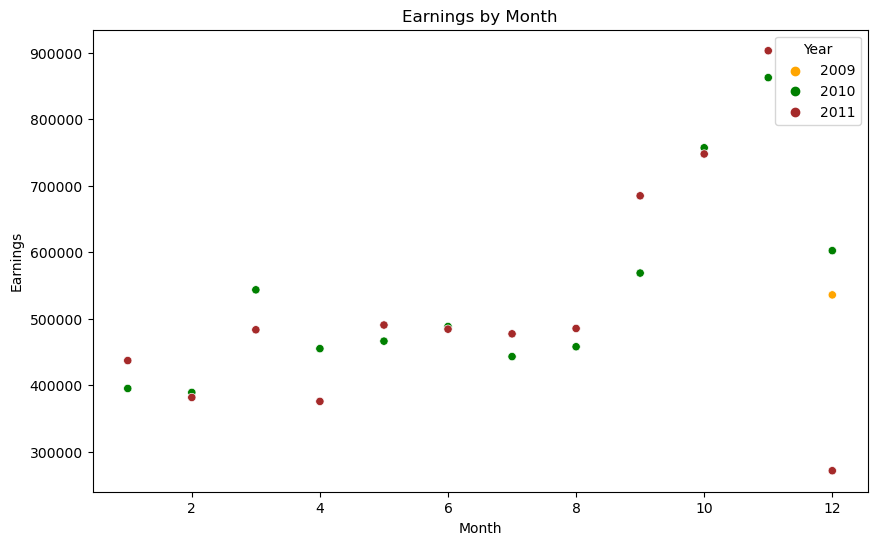

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Month', y='TotalPrice', hue='Year', data=orders_t,palette=['orange', 'green', 'brown'])
plt.xlabel('Month')
plt.ylabel('Earnings')
plt.title('Earnings by Month')
plt.show()